Base GaussianNB Accuracy: 0.964
Classification Report (GaussianNB):
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.96      1.00      0.98        55
           2       0.87      0.98      0.92        41
           3       1.00      0.91      0.95        66
           4       1.00      1.00      1.00        35

    accuracy                           0.96       250
   macro avg       0.96      0.97      0.97       250
weighted avg       0.97      0.96      0.96       250



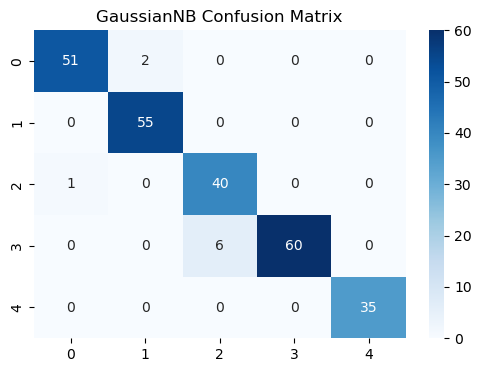


MultinomialNB Accuracy: 0.788
Classification Report (MultinomialNB):
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.67      0.78      0.72        55
           2       0.54      0.71      0.61        41
           3       1.00      0.68      0.81        66
           4       0.90      1.00      0.95        35

    accuracy                           0.79       250
   macro avg       0.81      0.80      0.80       250
weighted avg       0.82      0.79      0.79       250



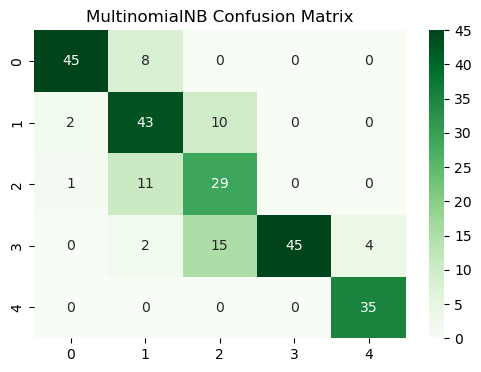


BernoulliNB Accuracy: 0.736
Classification Report (BernoulliNB):
               precision    recall  f1-score   support

           0       0.75      0.68      0.71        53
           1       0.72      0.80      0.76        55
           2       0.65      0.73      0.69        41
           3       0.73      0.70      0.71        66
           4       0.88      0.80      0.84        35

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



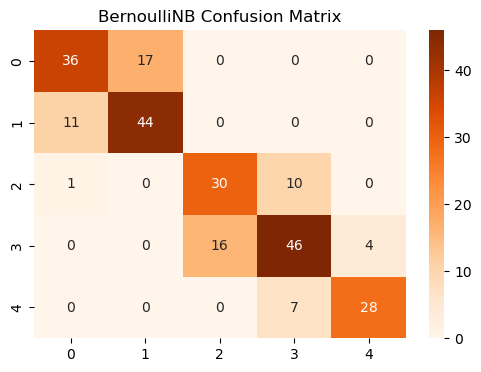


Cross Validation Results (5-Fold):
GaussianNB: Fold Accuracies = [0.965 0.96  0.875 0.96  0.92 ], Mean = 0.936
MultinomialNB: Fold Accuracies = [0.805 0.765 0.745 0.765 0.74 ], Mean = 0.764
BernoulliNB: Fold Accuracies = [0.735 0.755 0.785 0.74  0.72 ], Mean = 0.747

Model Comparison (Test Accuracy + CV Mean):
GaussianNB   : 0.964
MultinomialNB: 0.788
BernoulliNB  : 0.736


In [10]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


#Load dataset
data = pd.read_csv("final_dataset.csv")

#Convert Addiction Level into 5 balanced categories (0–4)
data['Addiction Level'] = pd.qcut(data['Addiction Level'], q=5, labels=[0,1,2,3,4]).astype(int)

features = [col for col in data.columns if col != "Addiction Level"]
target = "Addiction Level"

X = data[features]
y = data[target]

#Encode categorical columns
for col in X.select_dtypes(include=['object', 'bool']).columns:
    X[col] = X[col].astype('category').cat.codes

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#Base Gaussian Naive Bayes
base_nb = GaussianNB()
base_nb.fit(X_train, y_train)
y_pred_base = base_nb.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
print("Base GaussianNB Accuracy:", round(acc_base,3))
print("Classification Report (GaussianNB):\n", classification_report(y_test, y_pred_base))

cm_base = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6,4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("GaussianNB Confusion Matrix")
plt.show()


#Multinomial Naive Bayes (scaled 0–10)
X_train_m = X_train.copy()
X_test_m = X_test.copy()
num_cols = X_train_m.select_dtypes(include=[np.number]).columns

for col in num_cols:
    X_train_m[col] = np.round((X_train_m[col] - X_train_m[col].min()) /
                              (X_train_m[col].max() - X_train_m[col].min()) * 10)
    X_test_m[col] = np.round((X_test_m[col] - X_test_m[col].min()) /
                             (X_test_m[col].max() - X_test_m[col].min()) * 10)

multi_nb = MultinomialNB(alpha=0.5)
multi_nb.fit(X_train_m, y_train)
y_pred_multi = multi_nb.predict(X_test_m)

acc_multi = accuracy_score(y_test, y_pred_multi)
print("\nMultinomialNB Accuracy:", round(acc_multi,3))
print("Classification Report (MultinomialNB):\n", classification_report(y_test, y_pred_multi))

cm_multi = confusion_matrix(y_test, y_pred_multi)
plt.figure(figsize=(6,4))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("MultinomialNB Confusion Matrix")
plt.show()


#Bernoulli Naive Bayes (binary 0/1)
X_train_b = (X_train > X_train.mean()).astype(int)
X_test_b = (X_test > X_train.mean()).astype(int)

bernoulli_nb = BernoulliNB(alpha=0.8)
bernoulli_nb.fit(X_train_b, y_train)
y_pred_bern = bernoulli_nb.predict(X_test_b)

acc_bern = accuracy_score(y_test, y_pred_bern)
print("\nBernoulliNB Accuracy:", round(acc_bern,3))
print("Classification Report (BernoulliNB):\n", classification_report(y_test, y_pred_bern))

cm_bern = confusion_matrix(y_test, y_pred_bern)
plt.figure(figsize=(6,4))
sns.heatmap(cm_bern, annot=True, fmt='d', cmap='Oranges',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("BernoulliNB Confusion Matrix")
plt.show()


#Cross Validation (5-Fold for all models)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
models = {"GaussianNB": base_nb, "MultinomialNB": multi_nb, "BernoulliNB": bernoulli_nb}

print("\nCross Validation Results (5-Fold):")
for name, model in models.items():
    if name == "MultinomialNB":
        X_mod = X.copy()
        for col in X_mod.select_dtypes(include=[np.number]).columns:
            X_mod[col] = np.round((X_mod[col] - X_mod[col].min()) /
                                  (X_mod[col].max() - X_mod[col].min()) * 10)
        scores = cross_val_score(model, X_mod, y, cv=kfold)
    elif name == "BernoulliNB":
        scores = cross_val_score(model, (X > X.mean()).astype(int), y, cv=kfold)
    else:
        scores = cross_val_score(model, X, y, cv=kfold)
    print(f"{name}: Fold Accuracies = {np.round(scores,3)}, Mean = {scores.mean():.3f}")


#Model Comparison Summary
print("\nModel Comparison (Test Accuracy + CV Mean):")
print(f"GaussianNB   : {acc_base:.3f}")
print(f"MultinomialNB: {acc_multi:.3f}")
print(f"BernoulliNB  : {acc_bern:.3f}")
